A_s*h_r**2/kappa - A_s*h_r**2*exp(-z/h_r)/kappa - A_s*h_r**2*z/(L*kappa) + A_s*h_r**2*z*exp(-L/h_r)/(L*kappa) + T_S + T_L*z/L - T_S*z/L
-A_s*h_r**2*m/kappa + A_s*h_r**2*m*exp(-L/h_r)/kappa + A_s*h_r**2/kappa - A_s*h_r**2*exp(-L*m/h_r)/kappa + T_L*m - T_S*m + T_S
T(z) = \frac{A_{s} h_{r}^{2}}{\kappa} - \frac{A_{s} h_{r}^{2} e^{- \frac{z}{h_{r}}}}{\kappa} - \frac{A_{s} h_{r}^{2} z}{L \kappa} + \frac{A_{s} h_{r}^{2} z e^{- \frac{L}{h_{r}}}}{L \kappa} + T_{S} + \frac{T_{L} z}{L} - \frac{T_{S} z}{L}
T(t) = - \frac{A_{s} \left(t w_{m} + z_{m0}\right) \left(\frac{h_{0} t w_{m}}{z_{m0}} + h_{0}\right)^{2}}{\kappa \left(\frac{L_{0} t w_{m}}{z_{m0}} + L_{0}\right)} + \frac{A_{s} \left(t w_{m} + z_{m0}\right) \left(\frac{h_{0} t w_{m}}{z_{m0}} + h_{0}\right)^{2} e^{- \frac{\frac{L_{0} t w_{m}}{z_{m0}} + L_{0}}{\frac{h_{0} t w_{m}}{z_{m0}} + h_{0}}}}{\kappa \left(\frac{L_{0} t w_{m}}{z_{m0}} + L_{0}\right)} + \frac{A_{s} \left(\frac{h_{0} t w_{m}}{z_{m0}} + h_{0}\right)^{2}}{\kappa} - \frac{A_{s} 

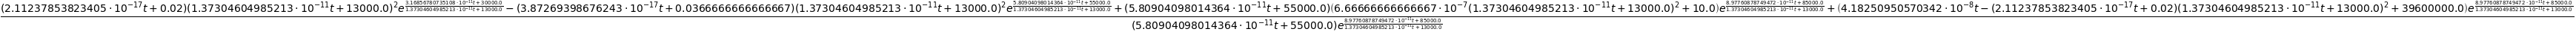

In [4]:
from sympy import *
init_printing()
z, t = symbols('z t',positive=True)
A, k, h0, z0, L0, H, w, h, L, m, T0 = symbols('A_s kappa h_0 z_{m0} L_0 H w_m h_r L m T_0', positive=True)
Ts,TL = symbols('T_S T_L', positive=True)


T = symbols('T',cls=Function)

Tsolve = dsolve(k*T(z).diff(z,z) + A*exp(-z/h), T(z), ics={T(0):Ts,T(L):TL})
# TL*m - Ts*m + h**2*A*m/k + h**2*A*m/k*exp(-L/h) + Ts + h**2*A/k - h**2*A/k*exp(-L*m/h)

Tsolve = Tsolve.simplify()

print(Tsolve.rhs)
print(Tsolve.rhs.subs(z,m*L).expand().simplify())

print("T(z) = {}".format(latex(Tsolve.rhs)))
Tmoho = Tsolve.rhs.subs([[z,z0+w*t],[h,h0+w*h0/z0*t],[L,L0+L0/z0*w*t]])
print("T(t) = {}".format(latex(Tmoho)))

dTdt = diff(Tmoho,t).expand().simplify()
Tt = integrate(dTdt,t) + T0

vals = {
    A: 2.0e-6,
    h0: 13.0e3,
    w: 1.e-3/3.156e+7, # 1 mm/yr
    z0: 30.0e3,
    k: 3.0,
    Ts: 10.,
    TL: 1330.,
    L0: 55.e3
}

print("T0 = {}".format(Tmoho.subs(vals).subs(t,0)))
print("T1 = {}".format(Tmoho.subs(vals).subs(t,1.578e+15)))

print("dTdt = {}".format(latex(dTdt)))
print(dTdt.subs(vals).simplify())
dTdt